# 1. analyse the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("hr_dataset.csv")

In [3]:
data

satisfaction  evaluation  number_of_projects  average_montly_hours  \
0              0.38        0.53                   2                   157   
1              0.80        0.86                   5                   262   
2              0.11        0.88                   7                   272   
3              0.72        0.87                   5                   223   
4              0.37        0.52                   2                   159   
...             ...         ...                 ...                   ...   
14994          0.40        0.57                   2                   151   
14995          0.37        0.48                   2                   160   
14996          0.37        0.53                   2                   143   
14997          0.11        0.96                   6                   280   
14998          0.37        0.52                   2                   158   

       time_spend_company  work_accident  churn  promotion department  salary  
0                       3              0      1          0      sales     low  
1                       6              0      1          0      sales  medium  
2                       4              0      1          0      sales  medium  
3                       5              0      1          0      sales     low  
4                       3              0      1          0      sales     low  
...                   ...            ...    ...        ...        ...     ...  
14994                   3              0      1          0    support     low  
14995                   3              0      1          0    support     low  
14996                   3              0      1          0    support     low  
14997                   4              0      1          0    support     low  
14998                   3              0      1          0    support     low  

[14999 rows x 10 columns]

In [4]:
data.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [5]:
data.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

In [6]:
data.describe()

satisfaction    evaluation  number_of_projects  average_montly_hours  \
count  14999.000000  14999.000000        14999.000000          14999.000000   
mean       0.612834      0.716102            3.803054            201.050337   
std        0.248631      0.171169            1.232592             49.943099   
min        0.090000      0.360000            2.000000             96.000000   
25%        0.440000      0.560000            3.000000            156.000000   
50%        0.640000      0.720000            4.000000            200.000000   
75%        0.820000      0.870000            5.000000            245.000000   
max        1.000000      1.000000            7.000000            310.000000   

       time_spend_company  work_accident         churn     promotion  
count        14999.000000   14999.000000  14999.000000  14999.000000  
mean             3.498233       0.144610      0.238083      0.021268  
std              1.460136       0.351719      0.425924      0.144281  
min              2.000000       0.000000      0.000000      0.000000  
25%              3.000000       0.000000      0.000000      0.000000  
50%              3.000000       0.000000      0.000000      0.000000  
75%              4.000000       0.000000      0.000000      0.000000  
max             10.000000       1.000000      1.000000      1.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
data.shape

(14999, 10)

# 2. Do exploratory data analysis

C:\Users\sgv30\AppData\Local\Temp\ipykernel_1380\304478272.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True).set_title('Correlation matrix for HR dataset')


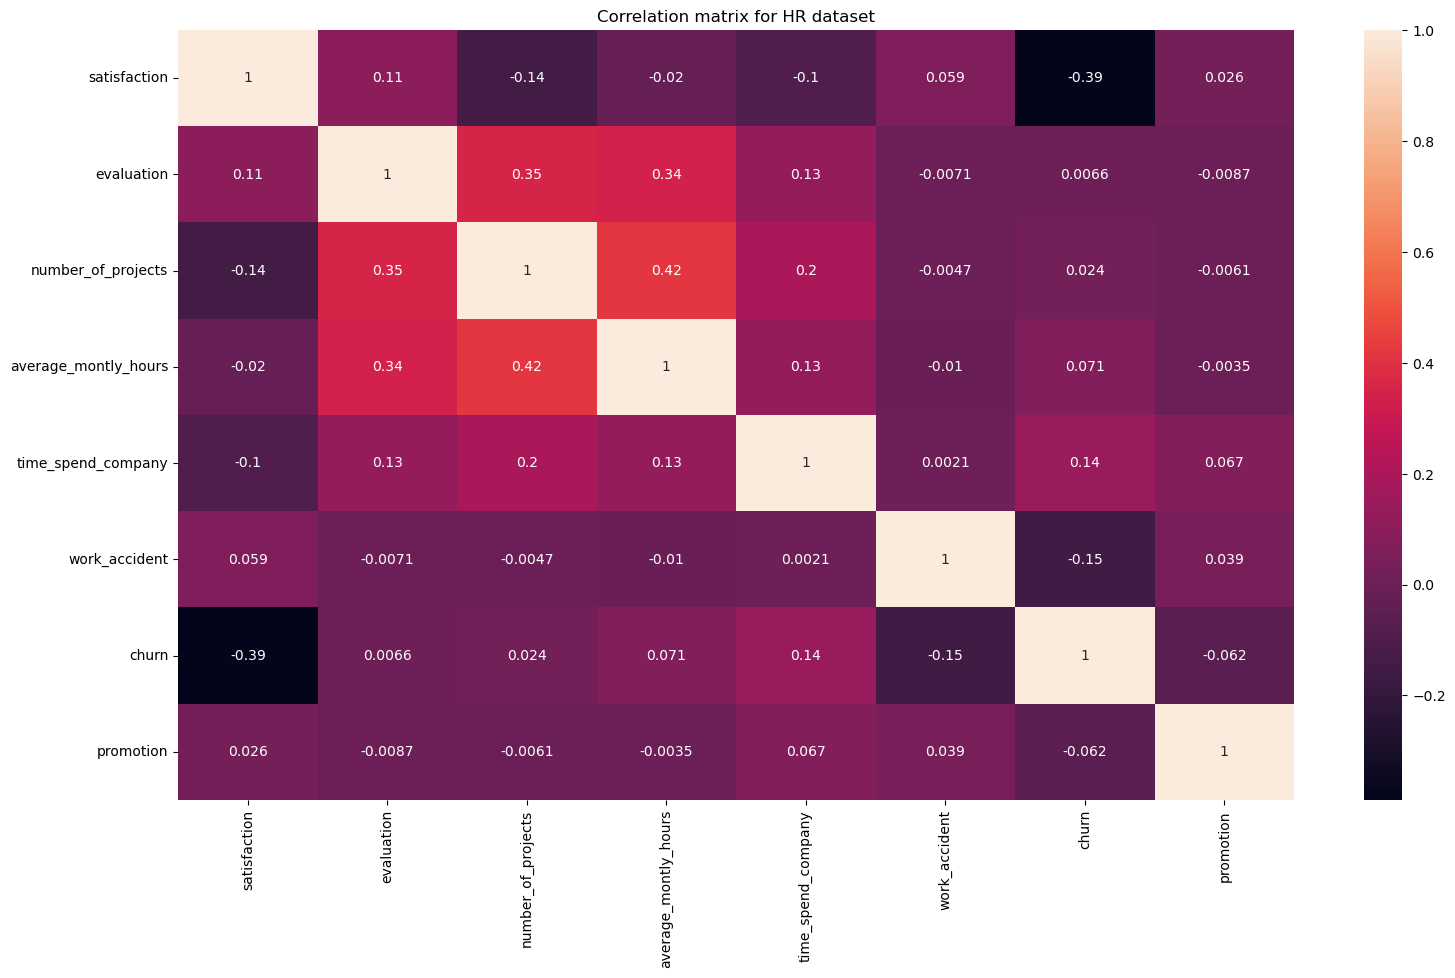

In [9]:
# we can now create a correlation matrix
fig, axes = plt.subplots(1, 1, figsize=(18, 10))

sns.heatmap(data.corr(), annot=True).set_title('Correlation matrix for HR dataset')
plt.show()

In [10]:
data.groupby(['churn'])['churn'].count().reset_index(name = 'Employee count')

churn  Employee count
0      0           11428
1      1            3571

<Axes: xlabel='churn', ylabel='count'>

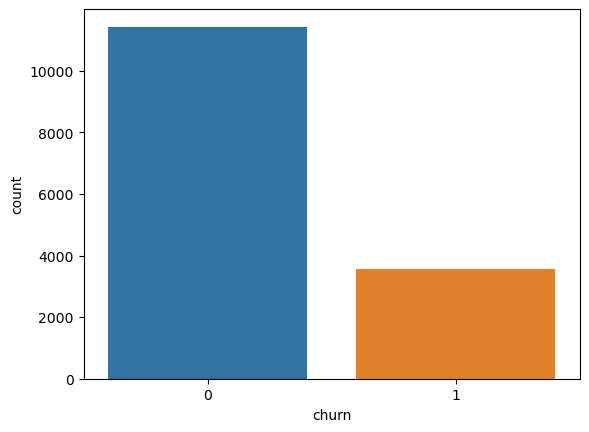

In [11]:
sns.countplot(x="churn", data=data)

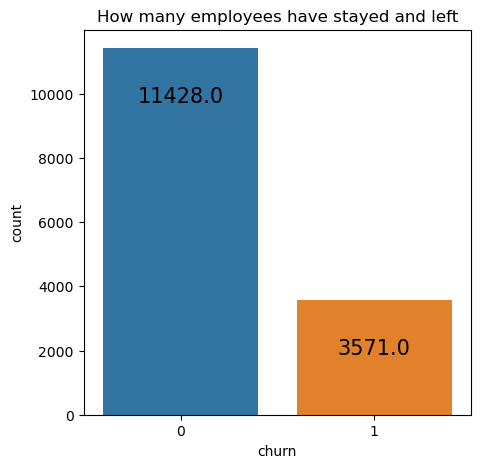

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
model_bar = sns.countplot(x="churn", data = data)
plt.title("How many employees have stayed and left") 

for p in model_bar.patches:
    model_bar.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -35), 
                   textcoords = 'offset points')

In [13]:
time_spend_count = data.groupby(['time_spend_company','churn'])['churn'].count().reset_index(name = 'Employee count')
time_spend_count

time_spend_company  churn  Employee count
0                    2      0            3191
1                    2      1              53
2                    3      0            4857
3                    3      1            1586
4                    4      0            1667
5                    4      1             890
6                    5      0             640
7                    5      1             833
8                    6      0             509
9                    6      1             209
10                   7      0             188
11                   8      0             162
12                  10      0             214

<Axes: xlabel='time_spend_company', ylabel='Employee count'>

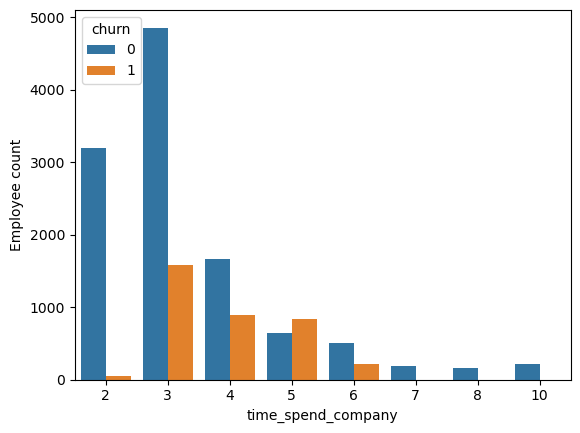

In [14]:
sns.barplot(x = 'time_spend_company', y = 'Employee count', data = time_spend_count, hue = 'churn')

In [15]:
number_project = data.groupby(['number_of_projects','churn'])['churn'].count().reset_index(name = 'Employee count')
number_project

number_of_projects  churn  Employee count
0                    2      0             821
1                    2      1            1567
2                    3      0            3983
3                    3      1              72
4                    4      0            3956
5                    4      1             409
6                    5      0            2149
7                    5      1             612
8                    6      0             519
9                    6      1             655
10                   7      1             256

<Axes: xlabel='number_of_projects', ylabel='Employee count'>

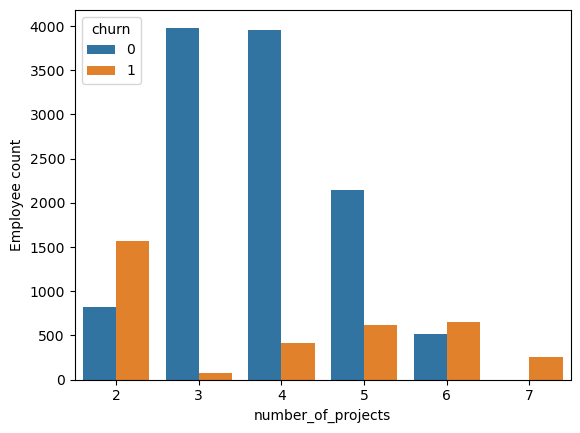

In [16]:
sns.barplot(x = 'number_of_projects', y = 'Employee count', data = number_project, hue = 'churn')

<Axes: xlabel='salary', ylabel='Employee count'>

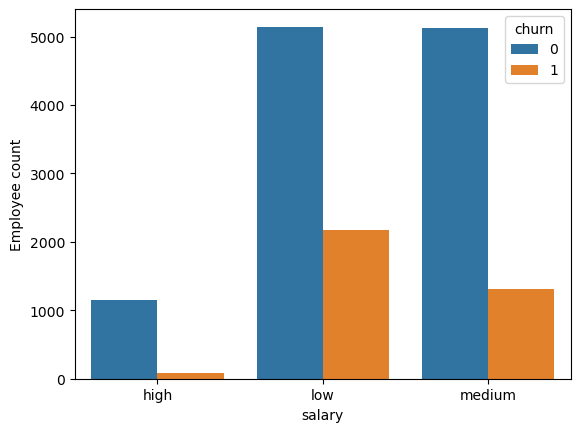

In [17]:
salary_count = data.groupby(['salary','churn'])['churn'].count().reset_index(name = 'Employee count')
sns.barplot(x = 'salary', y = 'Employee count', data = salary_count, hue = 'churn')

In [18]:

department_count = data.groupby(['department','churn'])['churn'].count().reset_index(name = 'Employee count')
department_count

department  churn  Employee count
0            IT      0             954
1            IT      1             273
2         RandD      0             666
3         RandD      1             121
4    accounting      0             563
5    accounting      1             204
6            hr      0             524
7            hr      1             215
8    management      0             539
9    management      1              91
10    marketing      0             655
11    marketing      1             203
12  product_mng      0             704
13  product_mng      1             198
14        sales      0            3126
15        sales      1            1014
16      support      0            1674
17      support      1             555
18    technical      0            2023
19    technical      1             697

# 3. Do data pre-processing


In [19]:
data.isna().sum() #missing values

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["salary"] = le.fit_transform(data["salary"])
data

satisfaction  evaluation  number_of_projects  average_montly_hours  \
0              0.38        0.53                   2                   157   
1              0.80        0.86                   5                   262   
2              0.11        0.88                   7                   272   
3              0.72        0.87                   5                   223   
4              0.37        0.52                   2                   159   
...             ...         ...                 ...                   ...   
14994          0.40        0.57                   2                   151   
14995          0.37        0.48                   2                   160   
14996          0.37        0.53                   2                   143   
14997          0.11        0.96                   6                   280   
14998          0.37        0.52                   2                   158   

       time_spend_company  work_accident  churn  promotion department  salary  
0                       3              0      1          0      sales       1  
1                       6              0      1          0      sales       2  
2                       4              0      1          0      sales       2  
3                       5              0      1          0      sales       1  
4                       3              0      1          0      sales       1  
...                   ...            ...    ...        ...        ...     ...  
14994                   3              0      1          0    support       1  
14995                   3              0      1          0    support       1  
14996                   3              0      1          0    support       1  
14997                   4              0      1          0    support       1  
14998                   3              0      1          0    support       1  

[14999 rows x 10 columns]

In [21]:
data = pd.get_dummies(data)

In [22]:
data

satisfaction  evaluation  number_of_projects  average_montly_hours  \
0              0.38        0.53                   2                   157   
1              0.80        0.86                   5                   262   
2              0.11        0.88                   7                   272   
3              0.72        0.87                   5                   223   
4              0.37        0.52                   2                   159   
...             ...         ...                 ...                   ...   
14994          0.40        0.57                   2                   151   
14995          0.37        0.48                   2                   160   
14996          0.37        0.53                   2                   143   
14997          0.11        0.96                   6                   280   
14998          0.37        0.52                   2                   158   

       time_spend_company  work_accident  churn  promotion  salary  \
0                       3              0      1          0       1   
1                       6              0      1          0       2   
2                       4              0      1          0       2   
3                       5              0      1          0       1   
4                       3              0      1          0       1   
...                   ...            ...    ...        ...     ...   
14994                   3              0      1          0       1   
14995                   3              0      1          0       1   
14996                   3              0      1          0       1   
14997                   4              0      1          0       1   
14998                   3              0      1          0       1   

       department_IT  department_RandD  department_accounting  department_hr  \
0                  0                 0                      0              0   
1                  0                 0                      0              0   
2                  0                 0                      0              0   
3                  0                 0                      0              0   
4                  0                 0                      0              0   
...              ...               ...                    ...            ...   
14994              0                 0                      0              0   
14995              0                 0                      0              0   
14996              0                 0                      0              0   
14997              0                 0                      0              0   
14998              0                 0                      0              0   

       department_management  department_marketing  department_product_mng  \
0                          0                     0                       0   
1                          0                     0                       0   
2                          0                     0                       0   
3                          0                     0                       0   
4                          0                     0                       0   
...                      ...                   ...                     ...   
14994                      0                     0                       0   
14995                      0                     0                       0   
14996                      0                     0                       0   
14997                      0                     0                       0   
14998                      0                     0                       0   

       department_sales  department_support  department_technical  
0                     1                   0                     0  
1                     1                   0                     0  
2                     1                   0                     0  
3                     1                   0                     0  
4  

# 4. Build models and evaluate the performance


In [23]:
x = data.drop("churn", axis=1)
y = data["churn"]

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=  sc.fit_transform(x)
x

array([[-0.93649469, -1.08727529, -1.46286291, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       [ 0.75281433,  0.84070693,  0.97111292, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       [-2.02247906,  0.95755433,  2.59376348, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.61745492,
         2.39353848, -0.4706553 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.61745492,
         2.39353848, -0.4706553 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.61745492,
         2.39353848, -0.4706553 ]])

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,random_state=32 )

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
cm_dtc = confusion_matrix(y_test, y_pred)
print(cm_dtc)
acc_dtc = accuracy_score(y_test, y_pred) * 100
acc_dtc


[[2283   35]
 [  19  663]]


98.2

In [28]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
cm_svc = confusion_matrix(y_test, y_pred)
print(cm_svc)
acc_svc = accuracy_score(y_test, y_pred)*100
acc_svc

[[2156  162]
 [ 491  191]]


78.23333333333333

In [29]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
               
y_pred = classifier.predict(x_test)
cm_ksvc = confusion_matrix(y_test, y_pred)
print(cm_svc)
acc_ksvc = accuracy_score(y_test, y_pred) *100
acc_ksvc

[[2156  162]
 [ 491  191]]


95.16666666666667

In [30]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)
acc_lr = accuracy_score(y_test, y_pred)*100
acc_lr

[[2124  194]
 [ 490  192]]


77.2

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
cm_rfc = confusion_matrix(y_test, y_pred)
print(cm_rfc)
acc_rfc = accuracy_score(y_test, y_pred)*100
acc_rfc

[[2314    4]
 [  21  661]]


99.16666666666667

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knc.fit(x_train, y_train)

y_pred = knc.predict(x_test)
cm_knc = confusion_matrix(y_test, y_pred)
print(cm_knc)
acc_knc = accuracy_score(y_test, y_pred)*100
acc_knc

[[2236   82]
 [  32  650]]


96.2

In [33]:
for k in range(3,16,2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print(acc,k)

0.9496666666666667 3
0.934 5
0.9433333333333334 7
0.9386666666666666 9
0.9353333333333333 11
0.9353333333333333 13
0.936 15


In [34]:
# lets create a dataframe to represent these

values = {'Model': ['Decision Tree','Linear SVC', 'RBF SVC', 'Logistic Regression', ' Random Forest', ' KNeighbors'],
        'Accuracy %': [acc_dtc,acc_svc,acc_ksvc,acc_lr,acc_rfc,acc_knc]}

model_accuracy_df = pd.DataFrame(values, columns = ['Model', 'Accuracy %'])
model_accuracy_df['Accuracy %'] = model_accuracy_df['Accuracy %'].round(2)
model_accuracy_df

Model  Accuracy %
0        Decision Tree       98.20
1           Linear SVC       78.23
2              RBF SVC       95.17
3  Logistic Regression       77.20
4        Random Forest       99.17
5           KNeighbors       96.20

# 5. Identify the cross validated score

In [38]:
from sklearn.model_selection import cross_val_score   # cross validation for random forest
score_rf=cross_val_score(rfc,x,y,cv=5)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.999      0.97966667 0.98533333 0.999      0.99466489]
Avg : 0.9915329776592199


In [39]:
from sklearn.model_selection import cross_val_score   # cross validation for desicin tree
score_rf=cross_val_score(dtc,x,y,cv=5)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.976      0.96533333 0.969      0.98566667 0.98266089]
Avg : 0.9757321773924641


In [46]:
from sklearn.model_selection import cross_val_score   # cross validation for K neighbors
score_rf=cross_val_score(knc,x,y,cv=5)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.97       0.942      0.947      0.97466667 0.96798933]
Avg : 0.9603311992886517


In [40]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier()
bg = BaggingClassifier(estimator = dt, n_estimators= 50)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_test)cross_results

In [41]:
confusion_matrix(y_test, y_pred)

array([[2311,    7],
       [  17,  665]], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred)

0.992

In [43]:
cross_results = cross_val_score(bg, x, y, cv = 5)

In [44]:
cross_results

array([0.99766667, 0.97766667, 0.98066667, 0.99766667, 0.99266422])

In [45]:
cross_results.mean()

0.9892661776147605